<a href="https://colab.research.google.com/github/Thieffenat/FreshFruit/blob/master/FAANG_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the libraries

import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



Using TensorFlow backend.


In [0]:
#get the stock quote
df =web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-01-31')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.216454
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.393181
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.402374
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.768150
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.563072
...,...,...,...,...,...,...
2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,308.218506
2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,316.937805
2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,323.572052


In [0]:
#Get the number of rows and columns in the data set
df.shape

(1279, 6)

AttributeError: ignored

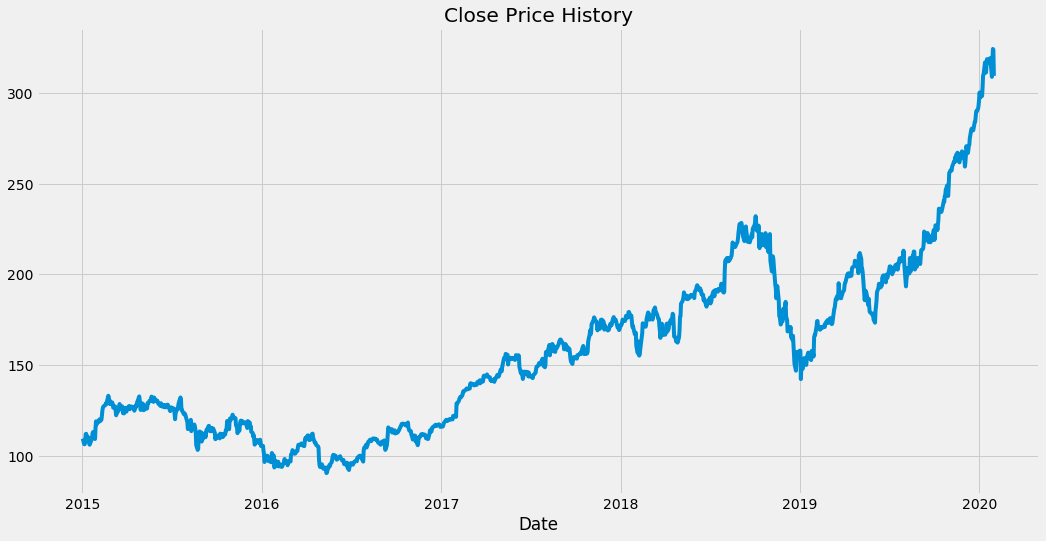

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', frontsize=18)
plt.ylabel('Close Price USD ($)', frontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1024

In [0]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.08115387],
       [0.06799147],
       [0.06803421],
       ...,
       [1.        ],
       [0.99799145],
       [0.93662399]])

In [0]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.08115387, 0.06799147, 0.06803421, 0.07440173, 0.09209403,
       0.09260686, 0.08081198, 0.08495729, 0.08316242, 0.07042736,
       0.06688035, 0.07854703, 0.08209405, 0.09427353, 0.09675217,
       0.09726497, 0.08034189, 0.10670941, 0.1220513 , 0.11461542,
       0.12089744, 0.12098293, 0.1248718 , 0.12649575, 0.1221795 ,
       0.12555558, 0.13538462, 0.14760684, 0.15435899, 0.15700857,
       0.1602137 , 0.16401711, 0.16286325, 0.16735044, 0.18230771,
       0.17876069, 0.16431623, 0.17128206, 0.16290603, 0.16559829,
       0.16675216, 0.16324785, 0.15414533, 0.15495727, 0.15726497,
       0.14602567, 0.13632479, 0.14576923, 0.14209402, 0.14790599,
       0.15683763, 0.16294874, 0.15880343, 0.15196583, 0.15756411,
       0.15534191, 0.14119659, 0.1448718 , 0.14064104, 0.15397439])]
[0.1456837776379708]

[array([0.08115387, 0.06799147, 0.06803421, 0.07440173, 0.09209403,
       0.09260686, 0.08081198, 0.08495729, 0.08316242, 0.07042736,
       0.06688035, 0.07854703, 0.082

In [0]:
#Convert the x_train and y_train to numby arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(964, 60, 1)

In [0]:
#build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
964/964 [==============================] - 84s 87ms/step - loss: 0.0011


In [0]:
#Create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [0]:
#Convert the data to a numpy arrap
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [0]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [0]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test )**2 )
rmse 

1.8908578910079656

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


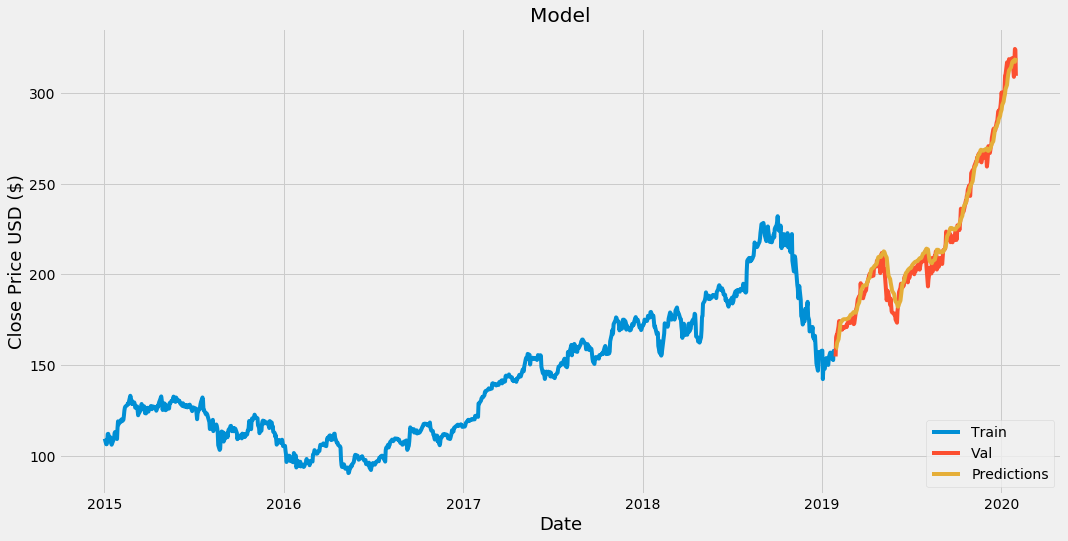

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-29,154.679993,158.871185
2019-01-30,165.250000,159.061508
2019-01-31,166.440002,160.379257
2019-02-01,166.520004,162.247772
2019-02-04,171.250000,164.192123
...,...,...
2020-01-27,308.950012,318.014709
2020-01-28,317.690002,317.354156
2020-01-29,324.339996,317.250275


In [0]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-01-31')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 day clsoing price values and convert tha dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an emplty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[318.83585]]


In [0]:
#get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-01-31', end='2020-01-31')
print(apple_quote2['Close'])

Date
2020-01-31    309.51001
Name: Close, dtype: float64
